# The Prediction of Income Based On Personal and Career Information

   Everyone who enters college has a huge question that sits on their mind, at least once if not more. 

   Why am I here? 

   Years spent in school for almost your entire life and you'd hope it pay out by getting a solid job. 
    
## The Question

   A great question, that would be a strong case for why schooling after high-school should be attempted, is can we accurately predict whether someone makes over a certain amount of money deemed fit for a decent paying career. A question that can be tested and shown depending on attributes given by data we can physically see. Thankfully we have that data with us, because collecting it is probably a pain in the ass. From the data set I found from Kaggle, we have a number of attributes you would assume would be strong indicators of income. 
    
## The Data
    
   The attributes the data set has collected are age, which makes sense. The second is work class, which basically is the type of work the individual is whether that be private, State government, local government, non-profit, ect. The next attribute is "final weight" and I believe this is something to do with property possibly. The attribute is categorized as integers, and I don't know what it'd stand for so I will be editting this attribute out of the data. The next attribute is education. It's the *string* description of education. The number of different elements in the set of responses in the data are two-few in number for me to keep this attribute. The next attribute allows the previous to be removable. It's the description of education in integer form, giving the number of years the individuals been in school. This value seems more valuable. The next attribute is marrital status, which is something I can argue likely plays a part in income. Who gets married to broke people?? Not everybody lives life like "The Notebook". Occupation is the following attribute. I will show in the beginning of this presentation the actual number of responses in the set of this attribute. It's less elements then you would think with a dataset of this size. The next attribute is relationship, which is basically what family the individual has. It's a tough read of the data because it may be listed as Husband, Wife, Own-child, Not-in-Family, ect. Complicated, but likely has some weight as far as predicting income. Race, is the next attribute that's sad but true as an indicator of income. The sex is also a strong predictor because of the wage gap between male and females in the U.S. This hopefully will not be a bias in any of the algorithms because of the size of the dataset, but the final model that is shown to predict will also be tested with this attribute seperated for confirmation of the models effectiveness of predicting income. Hours per week is obviously an indicator, directly, to what an individual makes. If we had hourly wage then this wouldn't be very interesting because it'd be predicting something that could be accurately shown with a calculator. Country is also an attribute that can also be an influential piece of what the individual makes. The final attribute is the attribute we are predicting. With all the other attributes, can we predict an accurate answer for whether an individual will make more or less than \$50,000. 
   
To begin we will manipulate the data for something we'd like to work with and a set we can continuously refer to.

Below is a table describing the dataset we will be using with the datatype listed, if you didn't read through the previous paragraph fully.
    
|Age|Work Class|Education|Marital Status|Occupation|Relationship(s)|Race|Sex|Hours Per Week|Country|Income|
|------|------|------|------|------|------|------|------|------|------|------|
|int|string|int|string|string|string|int|int|int|string|int|

In [86]:
import pandas
import matplotlib.pyplot as plt
import matplotlib.colors as pltcolor
import numpy

The above code is for importing librarys and packages we need for expressing and reading the data.

In [87]:
originalData = pandas.read_csv("C:/Users/Kyle/Downloads/adult.csv", names=['age','wc','fw','edu', 'education', 'maritalStat', 'occupation', 'relationship', 'race', 'sex', 'cg', 'cl', 'hpw', 'country', 'income'])

This is the raw data.

In [88]:
originalData.head(10)

,age,wc,fw,edu,education,maritalStat,occupation,relationship,race,sex,cg,cl,hpw,country,income
0,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
1,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
2,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
3,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
4,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
6,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
7,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
8,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
9,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K


In [89]:
originalData = originalData.drop('fw', 1)
originalData = originalData.drop('edu', 1)
originalData = originalData.drop(0,0)
originalData = originalData.drop('cg', 1)
originalData = originalData.drop('cl', 1)

This is the data I've decided to drop, because I do not know what they are or I have reasoned why they are not appropriate for predicting income.

In [90]:
size = originalData.size
columns = originalData.columns

rows = size/len(columns)

We can see that we have ``` print(rows) ``` number of rows. Wow, you know I thought I could have code run inside a markdown from how the description of the command sounded. Whatever, I got 

In [91]:
print(rows)

48842.0


This number should be confirmed by the tail method of the originalData data frame.

In [92]:
originalData.tail(2)

,age,wc,education,maritalStat,occupation,relationship,race,sex,hpw,country,income
48841,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K
48842,52,Self-emp-inc,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,>50K


Sweeeet, I got exactly what I thought I'd get. That's a nice feeling.

Now let's set the attributes we wanted as integers instead of strings. The attributes we'll replace with 1's and 2's and ect. will be race, sex, and income. To do this we first need to use the set method on the columns so we can get an array that shows us all the different kinds of strings I'm working with. The set() method will also tell us whether the column contains any '?' or blanks. This will be helpful for finding data that wasn't captured or written in.

In [93]:
set(originalData.loc[:, 'race'])

{'Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'Other', 'White'}

In [94]:
for a in range(int(rows)):
    string = originalData.iloc[a, 6]
    if (string == 'Black'):
        originalData.iloc[a, 6] = 0
    if (string == 'White'):
        originalData.iloc[a, 6] = 1
    if (string == 'Amer-Indian-Eskimo'):
        originalData.iloc[a, 6] = 2
    if (string == 'Asian-Pac-Islander'):
        originalData.iloc[a, 6] = 3
    if (string == 'Other'):
        originalData.iloc[a, 6] = 4

Simple if-statements that will explain our data. As seen, we have:

Black = 0

White = 1

Amer-Indian-Eskimo = 2

Asian-Pac-Islander = 3

Other = 4

We will continue this process with the other attributes for a desired DataFrame.

In [95]:
set(originalData.loc[:, 'sex'])

{'Female', 'Male'}

In [96]:
for a in range(int(rows)):
    string = originalData.iloc[a, 7]
    if (string == 'Female'):
        originalData.iloc[a, 7] = 0
    if (string == 'Male'):
        originalData.iloc[a, 7] = 1

The Female will be represented by a 1 and the Male will be represented by a 2.

In [108]:
set(originalData.iloc[:, 10]) #set(originalData.iloc[:, 'income'])

{'<=50K', '>50K'}

In [109]:
for a in range(int(rows)):
    string = originalData.iloc[a, 10]
    if (string == '<=50K'):
        originalData.iloc[a, 10] = 0
    if (string == '>50K'):
        originalData.iloc[a, 10] = 1

This means the attribute element for, 

UNDER 50K A YEAR = 0

while the element for,

OVER 50K = 1

In [110]:
originalData.head()

,age,wc,education,maritalStat,occupation,relationship,race,sex,hpw,country,income
1,25,Private,7,Never-married,Machine-op-inspct,Own-child,0,1,40,United-States,0
2,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,1,1,50,United-States,0
3,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,1,1,40,United-States,1
4,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,0,1,40,United-States,1
5,18,?,10,Never-married,?,Own-child,1,0,30,United-States,0


Beautiful, we can also get rid of all the rows with '?' in any of the columns, but first we can see how abundant they are.

This process will be for loop and might take a minute to load, as it'll be reading through all the data. I will not be too in-depth with what I'm doing.

In [117]:
i = 0

for a in range(int(rows)):
    if (originalData.iloc[a, 1] == '?'):
            i += 1

In [118]:
print(i)

2799


In [122]:
i = 0

for a in range(int(rows)):
    if (originalData.iloc[a, 4] == '?'):
            i += 1
            
print(i)

2809


In [127]:
i = 0

for a in range(int(rows)):
    if (originalData.iloc[a, 9] == '?'):
            i += 1
            
print(i)

857


In [128]:
i = 0

for a in range(int(rows)):
    if (originalData.iloc[a, 10] == '?'):
            i += 1
            
print(i)

0


Went through and checked if any column contains '?' and kept them there to see how many each column has. We can see that compared to the total number of data points, the 2000 is small enough to be able to take them out.

In [140]:
originalData = originalData[originalData.wc!='?']

In [141]:
originalData = originalData[originalData.occupation!='?']

In [142]:
originalData = originalData[originalData.country!='?']

In [144]:
originalData.head(5)

,age,wc,education,maritalStat,occupation,relationship,race,sex,hpw,country,income
1,25,Private,7,Never-married,Machine-op-inspct,Own-child,0,1,40,United-States,0
2,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,1,1,50,United-States,0
3,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,1,1,40,United-States,1
4,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,0,1,40,United-States,1
6,34,Private,6,Never-married,Other-service,Not-in-family,1,1,30,United-States,0


Lets run through the data to make sure there aren't any missing pieces!!

In [151]:
size = originalData.size
columns = len(originalData.columns)
rows = size/columns

print('The data sets size is', size, '. The data sets number of rows is', rows)

The data sets size is 497442 . The data sets number of rows is 45222.0


In [163]:
i = 0

for a in range(int(rows)):
    if (originalData.iloc[a, 10] == '?'):
            i += 1
            
print(i)

0


## Data Manipulation

The data has now been manipulated as much as it was needed to be for us to be able to work with it! I can now begin using the data for modeling and beginning to predict values! I will be using a copy of the original data that I may name something easy or something that explains which model it is meant to be used for.

# Begin Graphing and Modeling Data

Now that we can work with the data, we'll first look at the first model we'll be using to predict. 

This model is the LinearRegression model imported from the sklearn package.

In [173]:
import seaborn
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

modelData = originalData

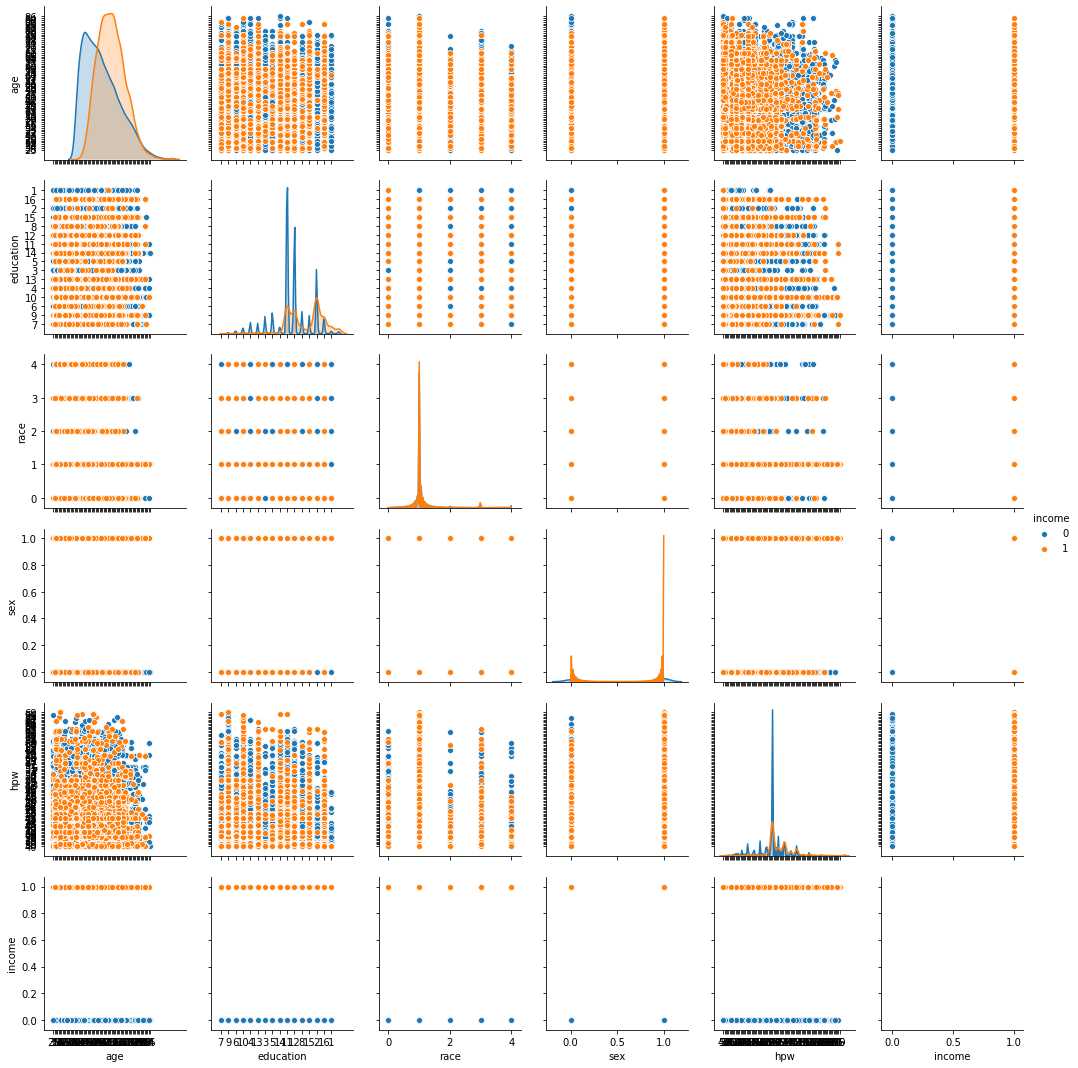

In [172]:
picture = seaborn.pairplot(modelData, hue = 'income')
picture.fig.set_size_inches(15,15)

## Pairplot Description

The pair plot shown above shows us the relationship between all the attributes that have integer datatypes. The colors are surprisingly representing the Broncos, sko bro's. The orange represents the datapoints that are making OVER \$50,000 and the

blue represents the individuals making UNDER \$50,000. 

To go a step deeper into just the pair plot, we can see that in the bottom row we have income in the x-axis and the attributes (age, race, education, sex, hpw) in the y-axis and it shows how in every attribute we can see that most values have datapoints that are making UNDER and OVER \$50,000. The education, race and sex attributes depict what I mean the most. The data has variety, which is what we want.

The next step is to begin modeling the data and finding out what estimates this data correctly depending on the attributes we choose to look at. The pair plot would've shown linear and non-linear relationships that look like they can fit a model well. 

The first model I'll look at is the logisticRegression from sk.learn.

In [206]:
x = numpy.array(modelData[['age', 'education']])
y = numpy.array(modelData['income'])
y = y.astype('int')

In [207]:
n = x.shape[0]
test = int(0.20*n)            # We will use a test set made up of 20% of the data from our sample
perm = numpy.random.permutation(n)   
x = x[perm]
y = y[perm]
x_test = x[:test]       # Then create the test
y_test = y[:test]
x_train = x[test:]     # and train sets
y_train = y[test:]
    
model = LogisticRegression(solver = 'lbfgs').fit(x_train, y_train)

In [208]:
print('The training prediction: {}'.format(model.score(x_train, y_train)))
print('The testing prediction: {}'.format(model.score(x_test, y_test)))

The training prediction: 0.7774337995466858
The testing prediction: 0.7753206545776206


The Logistic Regression is a good start and has given decent results for what it has to offer as far as predictions based on age and education. Now let's look to see if any attributes added in can give better results!

In [210]:
x = numpy.array(modelData[['age', 'education', 'hpw']])
y = numpy.array(modelData['income'])
y = y.astype('int')

n = x.shape[0]
test = int(0.20*n)      
perm = numpy.random.permutation(n)   
x = x[perm]
y = y[perm]
x_test = x[:test]
y_test = y[:test]
x_train = x[test:] 
y_train = y[test:]
    
model = LogisticRegression(solver='lbfgs').fit(x_train, y_train)

print('The training prediction: {}'.format(model.score(x_train, y_train)))
print('The testing prediction: {}'.format(model.score(x_test, y_test)))

The training prediction: 0.7826303278235391
The testing prediction: 0.7892525431225121


In [212]:
x = numpy.array(modelData[['age', 'education', 'sex']])
y = numpy.array(modelData['income'])
y = y.astype('int')

n = x.shape[0]
test = int(0.20*n)      
perm = numpy.random.permutation(n)   
x = x[perm]
y = y[perm]
x_test = x[:test]
y_test = y[:test]
x_train = x[test:] 
y_train = y[test:]
    
model = LogisticRegression(solver='lbfgs').fit(x_train, y_train)

print('The training prediction: {}'.format(model.score(x_train, y_train)))
print('The testing prediction: {}'.format(model.score(x_test, y_test)))

The training prediction: 0.7918348167394549
The testing prediction: 0.7909111012826183


Looks like sex also has a huge impact on income if the models score is getting higher like it did.

In [214]:
x = numpy.array(modelData[['age', 'education', 'sex', 'race']])
y = numpy.array(modelData['income'])
y = y.astype('int')

n = x.shape[0]
test = int(0.20*n)      
perm = numpy.random.permutation(n)   
x = x[perm]
y = y[perm]
x_test = x[:test]
y_test = y[:test]
x_train = x[test:] 
y_train = y[test:]
    
model = LogisticRegression(solver='lbfgs').fit(x_train, y_train)

print('The training prediction: {}'.format(model.score(x_train, y_train)))
print('The testing prediction: {}'.format(model.score(x_test, y_test)))

The training prediction: 0.7919453811708773
The testing prediction: 0.7909111012826183


Looks like race made the model score a little weaker.

In [218]:
x = numpy.array(modelData[['age', 'education', 'sex', 'race', 'hpw']])
y = numpy.array(modelData['income'])
y = y.astype('int')

n = x.shape[0]
test = int(0.20*n)      
perm = numpy.random.permutation(n)   
x = x[perm]
y = y[perm]
x_test = x[:test]
y_test = y[:test]
x_train = x[test:] 
y_train = y[test:]
    
model = LogisticRegression(solver='lbfgs').fit(x_train, y_train)

print('The training prediction: {}'.format(model.score(x_train, y_train)))
print('The testing prediction: {}'.format(model.score(x_test, y_test)))

The training prediction: 0.7957045718392394
The testing prediction: 0.7978770455550641


With all the attributes that are int datatypes, we see the largest score from the model. I will boot strap this model and we'll see how strong the predictions are.

## Bootstrap Logistic Regression

In [243]:
def bootStrap(x, y, hF, iteration):
    n = x.shape[0]
    test = int(0.20*n)            # We will use a test set made up of 20% of the data from our sample
    perm = numpy.random.permutation(n)   
    x = x[perm]
    y = y[perm]
    x_test = x[:test]       # Then create the test
    y_test = y[:test]
    x_train = x[test:]     # and train sets
    y_train = y[test:]
    
    model = LogisticRegression(solver='lbfgs').fit(x_train, y_train)
    
    #print('The training prediction: {}'.format(model.score(x_train, y_train)))
    #print('The testing prediction: {}'.format(model.score(x_test, y_test)))
    
    hF.loc[iteration, 'train_1'] = model.score(x_train, y_train)
    hF.loc[iteration, 'test_1'] = model.score(x_test, y_test)

In [246]:
holderFrame = pandas.DataFrame(numpy.array([[0]*50]*2).transpose(), columns = ['train_1', 'test_1'])
iteration = 50

for a in range(iteration):
    
    bootStrap(x, y, holderFrame, a)

In [247]:
hF_mean, hF_std = [0]*2, [0]*2

for c in range(2):
    hF_mean[c] = numpy.mean(holderFrame.iloc[0:5, c])
    hF_std[c] = numpy.std(holderFrame.iloc[0:5, c])
    
holderFrame = holderFrame.append(pandas.Series(hF_mean, index = holderFrame.columns), ignore_index=True)
holderFrame = holderFrame.append(pandas.Series(hF_std, index = holderFrame.columns), ignore_index=True)

holderFrame.index = list(range(50)) + ['Mean', 'Standard Deviation']

In [249]:
holderFrame

,train_1,test_1
0,0.795290,0.798098
1,0.796202,0.795997
2,0.796202,0.795997
3,0.796672,0.793675
4,0.795207,0.798651
5,0.795318,0.799314
6,0.796230,0.796440
7,0.795649,0.797324
8,0.796147,0.796771
9,0.794516,0.801858


From the Logistic Regression we have strong estimations and have a pretty strong case for all the attributes having a somewhat linear relation with the predictor, income.

Re-iterate this because I'm not sure if Logistic is linear or not. 

## PCA and Finding Which Attributes Have a Stronger Impact on Prediction

In [294]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

weights = pca.fit_transform(x)

In [295]:
pandas.DataFrame(pca.components_,columns=['age', 'education', 'sex', 'race', 'hpw'],index = ['PC-1','PC-2'])

,age,education,sex,race,hpw
PC-1,0.917444,0.016812,0.005417,-0.000247,0.397473
PC-2,-0.397834,0.027563,0.007233,0.001164,0.917014


In [296]:
print(pca.explained_variance_ratio_)

[0.55766095 0.42128029]


The above table shows the actual components and the respective columns that they were generated from while the explained variance ratio depicts the two components that actuall make a difference and normalizes them and spits out their explained variance ration to 1.

Age and Hours per week look to be the most impactful attributes, but we'll likely use all 5 to keep the estimations strong.

## K-Nearest Neighbors Model

The next model to fit is the K-Nearest Neighbors which is a model that looks to the other points around the predicting point and if the other points around are majority 0, or 1, then the model predicts it to be the majority. This is a biased model, because of how it's set up and even though we may want to still see how the model acts after being fitted, I likely won't be using this as the final model.

We'll start from the beginning. 

In [306]:
from sklearn.neighbors import KNeighborsClassifier

def kNearest(k):
    x = numpy.array(modelData[['age', 'education', 'sex', 'race', 'hpw']])
    y = numpy.array(modelData['income'])
    y = y.astype('int')
    
    n = x.shape[0]
    test = int(0.20*n)      
    perm = numpy.random.permutation(n)   
    x = x[perm]
    y = y[perm]
    x_test = x[:test]
    y_test = y[:test]
    x_train = x[test:] 
    y_train = y[test:]

    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train, y_train)

    print('The training prediction: {}'.format(model.score(x_train, y_train)))
    print('The testing prediction: {}'.format(model.score(x_test, y_test)))

In [310]:
for a in range(15):
    kNearest(a+1)
    print('_________________')

The training prediction: 0.8175410470451656
The testing prediction: 0.731203007518797
_________________
The training prediction: 0.8132566753275471
The testing prediction: 0.7747678018575851
_________________
The training prediction: 0.8150533473381613
The testing prediction: 0.7679124281291464
_________________
The training prediction: 0.8142241141024932
The testing prediction: 0.7742149491375497
_________________
The training prediction: 0.8125103654154459
The testing prediction: 0.7654798761609907
_________________
The training prediction: 0.8114323622090773
The testing prediction: 0.7723352498894295
_________________
The training prediction: 0.812427442091879
The testing prediction: 0.7697921273772667
_________________
The training prediction: 0.8108242578362541
The testing prediction: 0.7848297213622291
_________________
The training prediction: 0.8069821438443253
The testing prediction: 0.7873728438743919
_________________
The training prediction: 0.8099397423848748
The testing p

In [311]:
kNearest(50)

The training prediction: 0.8012327934103599
The testing prediction: 0.8014153029632906


Giving a large k obviously makes the prediction more consistent with the training and testing. The problem is that certain people make more money based on the five attributes used to predict and are somewhat similar. Most older, white males make more money. It's not profiling as much as it's just true. This gives clout to the numbers produced by the model because we should be able to look around and see others in similar positions making just as much money.

The estimations from k=15 to k=50 doesn't change too much, so I'll stick with k=50 and bootstrap that thang.

## Bootstrap K-Nearest Neighbors

In [314]:
def bootStrap(k, hF, iteration):
    x = numpy.array(modelData[['age', 'education', 'sex', 'race', 'hpw']])
    y = numpy.array(modelData['income'])
    y = y.astype('int')
    
    n = x.shape[0]
    test = int(0.20*n)      
    perm = numpy.random.permutation(n)   
    x = x[perm]
    y = y[perm]
    x_test = x[:test]
    y_test = y[:test]
    x_train = x[test:] 
    y_train = y[test:]

    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train, y_train)
    
    hF.loc[iteration, 'train_1'] = model.score(x_train, y_train)
    hF.loc[iteration, 'test_1'] = model.score(x_test, y_test)


In [315]:
holderFrame = pandas.DataFrame(numpy.array([[0]*50]*2).transpose(), columns = ['train_1', 'test_1'])
iteration = 50

for a in range(iteration):
    
    bootStrap(50, holderFrame, a)

In [316]:
hF_mean, hF_std = [0]*2, [0]*2

for c in range(2):
    hF_mean[c] = numpy.mean(holderFrame.iloc[0:5, c])
    hF_std[c] = numpy.std(holderFrame.iloc[0:5, c])
    
holderFrame = holderFrame.append(pandas.Series(hF_mean, index = holderFrame.columns), ignore_index=True)
holderFrame = holderFrame.append(pandas.Series(hF_std, index = holderFrame.columns), ignore_index=True)

holderFrame.index = list(range(50)) + ['Mean', 'Standard Deviation']

In [317]:
holderFrame

,train_1,test_1
0,0.802311,0.794560
1,0.801813,0.798209
2,0.801896,0.800088
3,0.800735,0.794449
4,0.802449,0.790469
5,0.803140,0.790801
6,0.800680,0.799867
7,0.801399,0.796329
8,0.804218,0.789363
9,0.800708,0.797103


This concludes a strong prediction for K-Nearest Neighbors and therefore we can say, for now, that this is a contender for the strongest model to fit to the data.

## Linear Discrimant Analysis and Support Vector Machines

Sorry I am not a fan of images!! I did not have enough time/pacients to learn the important stuff when it comes to plotting and describing models with images so I will not be in this final paper. Let's still jump into this next model and see how well it stands compared to the Logistic Regression and the K-Nearest Neighbors models.

In [328]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

modelData = originalData

def LDA():
    x = numpy.array(modelData[['age', 'education', 'sex', 'race', 'hpw']])
    y = numpy.array(modelData['income'])
    y = y.astype('int')
    
    n = x.shape[0]
    test = int(0.20*n)      
    perm = numpy.random.permutation(n)   
    x = x[perm]
    y = y[perm]
    x_test = x[:test]
    y_test = y[:test]
    x_train = x[test:] 
    y_train = y[test:]

    model = LinearDiscriminantAnalysis()
    model.fit(x_train, y_train)

    print('The training prediction: {}'.format(model.score(x_train, y_train)))
    print('The testing prediction: {}'.format(model.score(x_test, y_test)))

In [329]:
LDA()

The training prediction: 0.7980264248991099
The testing prediction: 0.7896948252985405


Great outcomes, almost as good as the k_nearest neighbors. I will be fully honest, the page in the lecture notes that goes over Linear Discrimnant Analysis is extremely comfusing and is heavy in computational code. The challenge of going through this model was time. I cannot explain why the model gives results, and therefore will not likely be using it even if it does give the best fit for the data. I will be boot strapping it and showing what the averages are.

## Bootstrap LDA

In [330]:
def bootStrap(hF, iteration):
    x = numpy.array(modelData[['age', 'education', 'sex', 'race', 'hpw']])
    y = numpy.array(modelData['income'])
    y = y.astype('int')
    
    n = x.shape[0]
    test = int(0.20*n)      
    perm = numpy.random.permutation(n)   
    x = x[perm]
    y = y[perm]
    x_test = x[:test]
    y_test = y[:test]
    x_train = x[test:] 
    y_train = y[test:]

    model = LinearDiscriminantAnalysis()
    model.fit(x_train, y_train)
    
    hF.loc[iteration, 'train_1'] = model.score(x_train, y_train)
    hF.loc[iteration, 'test_1'] = model.score(x_test, y_test)

In [332]:
holderFrame = pandas.DataFrame(numpy.array([[0]*50]*2).transpose(), columns = ['train_1', 'test_1'])
iteration = 50

for a in range(iteration):
    
    bootStrap(holderFrame, a)
    
hF_mean, hF_std = [0]*2, [0]*2

for c in range(2):
    hF_mean[c] = numpy.mean(holderFrame.iloc[0:5, c])
    hF_std[c] = numpy.std(holderFrame.iloc[0:5, c])
    
holderFrame = holderFrame.append(pandas.Series(hF_mean, index = holderFrame.columns), ignore_index=True)
holderFrame = holderFrame.append(pandas.Series(hF_std, index = holderFrame.columns), ignore_index=True)

holderFrame.index = list(range(50)) + ['Mean', 'Standard Deviation']

holderFrame

,train_1,test_1
0,0.794820,0.802189
1,0.796700,0.793454
2,0.795345,0.798209
3,0.794488,0.800310
4,0.795953,0.797545
5,0.795787,0.795666
6,0.796948,0.792680
7,0.795677,0.796882
8,0.795318,0.799757
9,0.795926,0.796992


I thought the bootstrap would show stronger results for the average, but still consistent with all the other models!

Let's look at the next model!!

## Support Vector Mechines

In [333]:
from sklearn.svm import SVC

In [334]:
x = numpy.array(modelData[['age', 'education', 'sex', 'race', 'hpw']])
y = numpy.array(modelData['income'])
y = y.astype('int')

n = x.shape[0]
test = int(0.20*n)      
perm = numpy.random.permutation(n)   
x = x[perm]
y = y[perm]
x_test = x[:test]
y_test = y[:test]
x_train = x[test:] 
y_train = y[test:]

model = SVC(C=1, gamma='scale', kernel='linear')
model.fit(x_train, y_train)

print('The training prediction: {}'.format(model.score(x_train, y_train)))
print('The testing prediction: {}'.format(model.score(x_test, y_test)))

The training prediction: 0.7960639062413621
The testing prediction: 0.7958867757629368


This model was suprisingly long to compute its fit for the data. The parameters of the model are also complicated. The C is for normalization or regularization with a penalty of c squared. This puts 1 as the best option of regularization for the model, without larger penalties taken into account. The gamme paramter could be 'auto' or a float, representing 1 / (n_features * X.var()) as value of gamma. The kernal parameter is passed with a string that tells how it computes the kernal type in the algorithm. In the lecture notes, the parameter was given as 'linear' but the default is 'rbl' and I will stick with the 'linear'.

I will not be boot straping this model, because of how long it took to only compute 1 fit to the model, I'd hate to sit here and do absolutely nothing while it loads. The model is still consistent with the Logistic, K-Nearest, and LSD models. That's a great sign as far as what kind of data this is. 

## What the models tell about the data so far

I think the data is perfect for being modeled with most models. Showing, on average, almost similar results all the way through and this is the fourth model.

The models discussed were great models, but we are now about to discuss the decsion tree, nueral network and ensemble models. These are less difficult to explain and more accurate in fitting the data. These are the models I'm excited to see in action!!

## Decsion Tree

In [343]:
import matplotlib.colors as pltco
from sklearn.tree import DecisionTreeClassifier

In [355]:
x = numpy.array(modelData[['age', 'education', 'sex', 'race', 'hpw']])
y = numpy.array(modelData['income'])
y = y.astype('int')

tree = DecisionTreeClassifier(min_samples_leaf=5)

tree.fit(x, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [356]:
n = x.shape[0]
test = int(0.20*n)      
perm = numpy.random.permutation(n)   
x = x[perm]
y = y[perm]
x_test = x[:test]
y_test = y[:test]
x_train = x[test:] 
y_train = y[test:]

print('The training prediction: {}'.format(tree.score(x_train, y_train)))
print('The testing prediction: {}'.format(tree.score(x_test, y_test)))

The training prediction: 0.8254187627840124
The testing prediction: 0.8290579389650597


In [359]:
for a in range(10):
    n = x.shape[0]
    test = int(0.20*n)      
    perm = numpy.random.permutation(n)   
    x = x[perm]
    y = y[perm]
    x_test = x[:test]
    y_test = y[:test]
    x_train = x[test:] 
    y_train = y[test:]
    
    tree = DecisionTreeClassifier(min_samples_leaf=a+1)

    tree.fit(x, y)
    
    print('Test:', a+1)

    print('The training prediction: {}'.format(tree.score(x_train, y_train)))
    print('The testing prediction: {}'.format(tree.score(x_test, y_test)))
    print('-------------------')

Test: 1
The training prediction: 0.8584775277793134
The testing prediction: 0.8575851393188855
-------------------
Test: 2
The training prediction: 0.8402620377024711
The testing prediction: 0.8334807607253427
-------------------
Test: 3
The training prediction: 0.8343744817292277
The testing prediction: 0.8330384785493145
-------------------
Test: 4
The training prediction: 0.8311404721101222
The testing prediction: 0.8191065900044229
-------------------
Test: 5
The training prediction: 0.8254740449997235
The testing prediction: 0.8291685095090667
-------------------
Test: 6
The training prediction: 0.8250317872740339
The testing prediction: 0.8203228659885007
-------------------
Test: 7
The training prediction: 0.8223782409198961
The testing prediction: 0.8219814241486069
-------------------
Test: 8
The training prediction: 0.8221571120570512
The testing prediction: 0.815015479876161
-------------------
Test: 9
The training prediction: 0.8192271546243574
The testing prediction: 0.821

My laptop is saying I do not have the graphviz on Anaconda, and I'm pretty sure I uploaded Homework 8 with it so I printed out what all the different fits of the model were with the number of leafs incrementing by 1. This is not a boot strap. This is an easy way of showing how many leafs are needed for a strong estimation of error. The conclusion I found was after 10 leafs, it's relatively the same results from the model.score(). I will not boot strap this method. Sucks I don't have a cool tree to show off. I might have the last one saved. If so, I'll pull it up for the presentation.

To continue in this long list of models, we have now reached close to the end where I'll talk about Neural Networks and get into my personal favorite. This model is extremely interesting to me because of how the model initially works. To relate a model to a neuron is a classic biomimicry that we can see in a scientific field. The Neuron is so complicated, it's only just to imaging that if anything were to understand or explain it, it would be a computer. The idea of using a conviluted manner of getting information through layers of information gathered and sent to the next layer only to gain the previous number of cells times of knowledge is fascinating. 

In [360]:
from sklearn.neural_network import MLPClassifier

In [365]:
modelData = originalData
model = MLPClassifier(hidden_layer_sizes = (100, 100))

x = numpy.array(modelData[['age', 'education', 'sex', 'race', 'hpw']])
y = numpy.array(modelData['income'])
y = y.astype('int')

n = x.shape[0]
test = int(0.20*n)      
perm = numpy.random.permutation(n)   
x = x[perm]
y = y[perm]
x_test = x[:test]
y_test = y[:test]
x_train = x[test:] 
y_train = y[test:]

model.fit(x_train, y_train)

print('Training Prediction: {}'.format(model.score(x_train, y_train)))
print('Testing Prediction: {}'.format(model.score(x_test, y_test)))

Training Prediction: 0.8056000884515452
Testing Prediction: 0.7986510393631137


In [367]:
model = MLPClassifier(hidden_layer_sizes = (100, 100, 10))

x = numpy.array(modelData[['age', 'education', 'sex', 'race', 'hpw']])
y = numpy.array(modelData['income'])
y = y.astype('int')

n = x.shape[0]
test = int(0.20*n)      
perm = numpy.random.permutation(n)   
x = x[perm]
y = y[perm]
x_test = x[:test]
y_test = y[:test]
x_train = x[test:] 
y_train = y[test:]

model.fit(x_train, y_train)

print('Training Prediction: {}'.format(model.score(x_train, y_train)))
print('Testing Prediction: {}'.format(model.score(x_test, y_test)))

Training Prediction: 0.7964508817513406
Testing Prediction: 0.7966607695709863


In [368]:
model = MLPClassifier(hidden_layer_sizes = (100, 100, 100))

x = numpy.array(modelData[['age', 'education', 'sex', 'race', 'hpw']])
y = numpy.array(modelData['income'])
y = y.astype('int')

n = x.shape[0]
test = int(0.20*n)      
perm = numpy.random.permutation(n)   
x = x[perm]
y = y[perm]
x_test = x[:test]
y_test = y[:test]
x_train = x[test:] 
y_train = y[test:]

model.fit(x_train, y_train)

print('Training Prediction: {}'.format(model.score(x_train, y_train)))
print('Testing Prediction: {}'.format(model.score(x_test, y_test)))

Training Prediction: 0.8029465420974072
Testing Prediction: 0.8073861123396727


In [369]:
model = MLPClassifier(hidden_layer_sizes = (100, 100, 100, 10))

x = numpy.array(modelData[['age', 'education', 'sex', 'race', 'hpw']])
y = numpy.array(modelData['income'])
y = y.astype('int')

n = x.shape[0]
test = int(0.20*n)      
perm = numpy.random.permutation(n)   
x = x[perm]
y = y[perm]
x_test = x[:test]
y_test = y[:test]
x_train = x[test:] 
y_train = y[test:]

model.fit(x_train, y_train)

print('Training Prediction: {}'.format(model.score(x_train, y_train)))
print('Testing Prediction: {}'.format(model.score(x_test, y_test)))

Training Prediction: 0.802062026646028
Testing Prediction: 0.7969924812030075


As shown the Neural Network model gives strong predictions that correlate to the other models results as well. These scores are a little low, but I did try a few different parameter choices and I believe the choice of (100,100,100) gave the best result. The testing and training are similar.

## Ensemble Models to Finish This Presentation of Models

Finally, shit. It's been a long explanation of models that range from challenging to explain to being as simple as looking at a picture. Hopefully this won't be the former.

In [370]:
from sklearn.ensemble import RandomForestClassifier

From the Ensemble models, I chose the Random Forest model. I was not present in class when this model was discussed and got most of my knowledge about this model from reading and online. I like how it's damn near a cross validation of the decsion tree model. 

P.S. This whole paper I've been writing "bootstrap" when I've really meant cross validation. It just hit me.

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement if ```bootstrap=True```.

In [371]:
model = RandomForestClassifier(n_estimators=100, max_depth=3)
model.fit(x_train, y_train)

print('Training Prediction: {}'.format(model.score(x_train, y_train)))
print('Testing Prediction: {}'.format(model.score(x_test, y_test)))

Training Prediction: 0.8040521864116313
Testing Prediction: 0.7982087571870854


In [372]:
model = RandomForestClassifier(n_estimators=100, max_depth=None)
model.fit(x_train, y_train)

print('Training Prediction: {}'.format(model.score(x_train, y_train)))
print('Testing Prediction: {}'.format(model.score(x_test, y_test)))

Training Prediction: 0.8637569793797335
Testing Prediction: 0.7822865988500664


In [373]:
model = RandomForestClassifier(n_estimators=100, max_depth=8)
model.fit(x_train, y_train)

print('Training Prediction: {}'.format(model.score(x_train, y_train)))
print('Testing Prediction: {}'.format(model.score(x_test, y_test)))

Training Prediction: 0.8076455304328598
Testing Prediction: 0.7996461742591774


In [374]:
model = RandomForestClassifier(n_estimators=200, max_depth=None)
model.fit(x_train, y_train)

print('Training Prediction: {}'.format(model.score(x_train, y_train)))
print('Testing Prediction: {}'.format(model.score(x_test, y_test)))

Training Prediction: 0.8637569793797335
Testing Prediction: 0.7828394515701017


If I could just get the stupid ass testing to go higher.

In [383]:
model = RandomForestClassifier(n_estimators=200, max_depth=10)
model.fit(x_train, y_train)

print('Training Prediction: {}'.format(model.score(x_train, y_train)))
print('Testing Prediction: {}'.format(model.score(x_test, y_test)))

Training Prediction: 0.8147492951517497
Testing Prediction: 0.8001990269792127


In [384]:
def bootStrap(hF, iteration):
    x = numpy.array(modelData[['age', 'education', 'sex', 'race', 'hpw']])
    y = numpy.array(modelData['income'])
    y = y.astype('int')
    
    n = x.shape[0]
    test = int(0.20*n)      
    perm = numpy.random.permutation(n)   
    x = x[perm]
    y = y[perm]
    x_test = x[:test]
    y_test = y[:test]
    x_train = x[test:] 
    y_train = y[test:]

    model = RandomForestClassifier(n_estimators=200, max_depth=10)
    model.fit(x_train, y_train)
    
    hF.loc[iteration, 'train_1'] = model.score(x_train, y_train)
    hF.loc[iteration, 'test_1'] = model.score(x_test, y_test)

In [385]:
holderFrame = pandas.DataFrame(numpy.array([[0]*50]*2).transpose(), columns = ['train_1', 'test_1'])
iteration = 50

for a in range(iteration):
    
    bootStrap(holderFrame, a)
    
hF_mean, hF_std = [0]*2, [0]*2

for c in range(2):
    hF_mean[c] = numpy.mean(holderFrame.iloc[0:5, c])
    hF_std[c] = numpy.std(holderFrame.iloc[0:5, c])
    
holderFrame = holderFrame.append(pandas.Series(hF_mean, index = holderFrame.columns), ignore_index=True)
holderFrame = holderFrame.append(pandas.Series(hF_std, index = holderFrame.columns), ignore_index=True)

holderFrame.index = list(range(50)) + ['Mean', 'Standard Deviation']

holderFrame

,train_1,test_1
0,0.815330,0.803074
1,0.815910,0.800199
2,0.814169,0.806391
3,0.813809,0.807718
4,0.813063,0.808160
5,0.814252,0.803406
6,0.812649,0.810703
7,0.813146,0.809266
8,0.814196,0.804401
9,0.815910,0.799093


Could've gotten better training predictions, but would've had to give up testing results. When the max_depth, which is the maximum number of nested leafs from each leaf on each tree will have, is set to ```None``` then the model fits the training extremely well. This is expected from a model that uses multiple trees. 

# Conclusion

To conclude the project, I will choose which model I have found to give the best results. Surprisingly it is the Ensemble model. It has given the strongest predictions compared to all other models. To reason why, the decsion tree model also gave great results, but similar to every other model. I believe that because of the model being many trees calculated into one prediction, it showed on the training set why it's a superior model. Having to fix the parameters until the testing sets results were also similar so I could then conclude what I'm concluding now! #Paradox.